# Определение перспективного тарифа для телеком компании

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
calls = pd.read_csv('C:/Users/Timofey/Downloads/calls.csv')
internet = pd.read_csv('C:/Users/Timofey/Downloads/internet.csv')
messages = pd.read_csv('C:/Users/Timofey/Downloads/messages.csv')
tariffs = pd.read_csv('C:/Users/Timofey/Downloads/tariffs.csv')
users = pd.read_csv('C:/Users/Timofey/Downloads/users.csv')

In [4]:
def review (df):
    display(df.head())
    print ()
    display (df.info())
    print()
    display (df.describe())
    print()
    print ('Количество дубликатов:',df.duplicated().sum())
    print()
    print('Количество пропусков:')
    print(df.isna().sum())
# Функция для просмотра основной информации по датасетам

In [5]:
review(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000



Количество дубликатов: 0

Количество пропусков:
id           0
call_date    0
duration     0
user_id      0
dtype: int64


In [6]:
review(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000



Количество дубликатов: 0

Количество пропусков:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


In [7]:
review(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000



Количество дубликатов: 0

Количество пропусков:
id              0
message_date    0
user_id         0
dtype: int64


In [8]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
review(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



Количество дубликатов: 0

Количество пропусков:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


В исходных файлах представленно 5 таблиц, описывающих данные 500 пользователей, тарифные планы, которые они используют, а также данные о звонках, сообщениях и интернет-трафике. Данные неоднородны по размеру. Потребуется заменить тип данных у столбцов с датой и временем, а также округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы считаются по минутам и мегабайтам. В таблице users присутствуют пропущенные значения в churn_date, скорее всего, это связано с тем, что тариф ещё действовал на момент выгрузки данных. В таблице interner присутствует лишний столбец дублирующий индекс, от него нужно будет избавиться.

## Подготовка данных

### Изменение типов данных

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
# Замена формата даты.

In [11]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
# Округление длительности разговоров до минут в большую сторону, изменение типа данных

### Исправление ошибок в данных

В таблице с информацией о звонках присутствует довольно много нулевых по продолжительности звонков, скорее всего, это пропущенные или непринятые вызовы. Стоит избавиться от этих строк.

<AxesSubplot:ylabel='Frequency'>

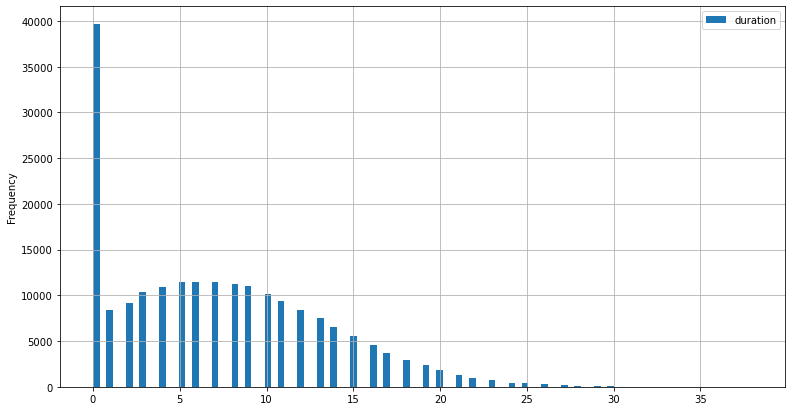

In [12]:
calls.plot(kind='hist', y='duration', grid=True, figsize=(13,7), bins=100)

In [13]:
calls = calls.drop(calls[calls['duration'] == 0 ]['duration'].index).reset_index(drop = True)

В таблице с потребляемым трафиком также присутствует большое количество нулевых значений, можно предположить, что это неудачные попытки загрузить что-либо в местах без связи. От этих строк так же можно избавиться.

<AxesSubplot:ylabel='Frequency'>

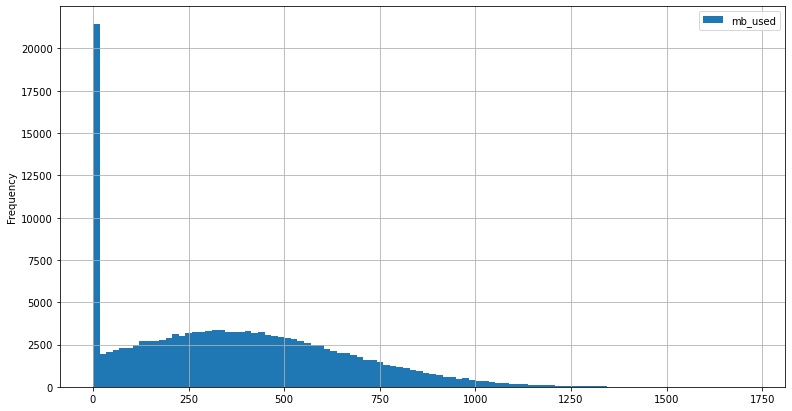

In [14]:
internet.plot(kind='hist', y='mb_used', grid=True, figsize=(13,7), bins=100)

In [15]:
internet = internet.drop(internet[internet['mb_used'] == 0 ]['mb_used'].index).reset_index(drop = True)

Удаление столбца 'Unnamed: 0' из датафрейма internet

In [16]:
internet=internet.drop(columns='Unnamed: 0')

### Суммарная активность пользователей по месяцам

Добавление столбцов с месяцами

In [17]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Группировка звонков, трафика и сообщений по пользователям и месяцам

In [18]:
user_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={"duration": "call_duration", "id":"number_of_calls"})

In [19]:
user_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={"id": "messages"})

In [20]:
user_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

Объединение всех интересующих данных в одной таблице и переименование столбца tariff_name для этого

In [21]:
tariffs=tariffs.rename(columns={"tariff_name":"tariff"})

In [22]:
df = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')\
.merge(user_internet, on=['user_id', 'month'], how='outer')\
.merge(users, on='user_id', how='left')\
.merge(tariffs, on='tariff', how='left')

Стоит избавить от столбцов, которые не будут использоваться в дальнейшем анализе

In [23]:
df = df.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')

Пропущенные значения стоит заменить нулями

In [24]:
df.fillna(0, inplace=True)

Ежемесячная выручка с каждого пользователя.

In [25]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    if row['call_duration']- row['minutes_included'] > 0:
        revenue_by_min = (row['call_duration']- row['minutes_included']) * row['rub_per_minute'] 
        
    if row['messages'] - row['messages_included'] > 0:
        revenue_by_messages = (row['messages'] - row['messages_included']) * row['rub_per_message'] 

    if row['mb_used'] - row['mb_per_month_included'] > 0:
        revenue_mb = np.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']

    return revenue_by_min + revenue_by_messages + revenue_mb + row['rub_monthly_fee']

In [26]:
df['revenue'] = df.apply(get_revenue, axis=1)

In [27]:
df.sample(10)

,user_id,month,call_duration,number_of_calls,messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
2852,1452,8,150.0,15.0,51.0,30466.81,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0
570,1092,6,212.0,29.0,22.0,7972.08,Ижевск,smart,50,15360,500,550,200,3,3,550.0
2775,1435,8,358.0,35.0,0.0,18991.00,Москва,smart,50,15360,500,550,200,3,3,1350.0
52,1006,12,379.0,44.0,0.0,18476.11,Ульяновск,smart,50,15360,500,550,200,3,3,1350.0
2190,1352,11,881.0,89.0,7.0,18766.26,Рязань,ultra,1000,30720,3000,1950,150,1,1,1950.0
597,1096,8,369.0,39.0,102.0,3664.59,Брянск,ultra,1000,30720,3000,1950,150,1,1,1950.0
1565,1250,12,446.0,50.0,43.0,11967.90,Смоленск,smart,50,15360,500,550,200,3,3,550.0
2122,1339,12,617.0,66.0,0.0,20769.96,Москва,smart,50,15360,500,550,200,3,3,2101.0
1837,1294,4,204.0,27.0,18.0,21066.00,Владивосток,ultra,1000,30720,3000,1950,150,1,1,1950.0
2414,1384,5,737.0,83.0,4.0,23380.30,Нижний Новгород,smart,50,15360,500,550,200,3,3,2861.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   call_duration          3214 non-null   float64
 3   number_of_calls        3214 non-null   float64
 4   messages               3214 non-null   float64
 5   mb_used                3214 non-null   float64
 6   city                   3214 non-null   object 
 7   tariff                 3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  reve

В результате предобработки данных получилась сгрупированная по пользователям и месяцам таблица со всеми необходимыми показателями.

## Анализ данных

### Cколько в среднем пользователю требуется минут, сообщений и мегабайт каждый месяц.

In [29]:
medians_by_month = df.pivot_table(index=['tariff', 'month'], values=['call_duration', 'messages', 'mb_used'], aggfunc=['median', 'count']).drop([( 'count',       'mb_used'), ( 'count',      'messages')], axis='columns')
#.rename(columns={( "count", "call_duration"):"users"}) не понимаю, как в этом случае можно переименовать столбец

In [30]:
medians_by_month

median                             count
             call_duration    mb_used messages call_duration
tariff month                                                
smart  1             162.5   7096.185     15.0            34
       2             258.0  12553.710     20.0            58
       3             409.0  15670.250     23.0            77
       4             368.5  14087.650     28.0           112
       5             433.0  16323.940     30.0           141
       6             400.0  16077.440     28.0           164
       7             414.0  15925.290     29.0           201
       8             432.0  16833.490     27.0           235
       9             435.0  16028.435     30.0           260
       10            427.5  17225.335     30.0           294
       11            428.5  17013.800     28.0           316
       12            471.0  17713.510     29.0           337
ultra  1             382.0  14791.370     32.0             9
       2             168.0   7327.125      5.5            24
       3             403.0  17495.180     20.0            37
       4             453.0  16645.780     17.0            55
       5             519.0  18696.430     25.0            67
       6             479.0  19480.205     27.5            84
       7             542.0  20014.220     38.0            91
       8             500.0  18932.620     40.0           107
       9             520.0  19656.300     43.0           115
       10            533.0  20338.150     49.0           123
       11            546.0  18377.790     43.0           134
       12            584.0  21972.630     51.0           139

### Среднее, медиана, дисперсия и стандартное отклонение для продолжительности звонков, использованного траффика и количества сообщений по тарифам.

In [31]:
df_stat = df.pivot_table(index=['tariff'], values=['call_duration', 'mb_used', 'messages'], aggfunc={'call_duration': [np.mean, np.median, np.var, np.std], 'mb_used': [np.mean, np.median, np.var, np.std], 'messages': [np.mean, np.median, np.var, np.std]}).applymap("{:.1f}".format)

In [32]:
df_stat

call_duration                          mb_used                    \
                mean median    std       var     mean   median      std   
tariff                                                                    
smart          417.9  422.0  190.3   36219.3  16208.4  16506.8   5870.5   
ultra          526.6  518.0  317.6  100873.6  19468.8  19308.0  10087.2   

                    messages                       
                var     mean median   std     var  
tariff                                             
smart    34462496.5     33.4   28.0  28.2   796.8  
ultra   101751013.8     49.4   38.0  47.8  2285.3

In [33]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В среднем пользователи тарифа ультра больше разговаривают по телефону, отправляют смс и пользуются интернетом. Среднестатестические пользователи не превышают тарифные лимиты по минутам и смс, только пользователям смарт часто приходится докупать 1 гб трафика сверх лимита. Дисперсии тарифа ультра больше, чем у тарифа смарт, это говорит нам о большем размахе значений. Выборка бралась, скорее всего, в первый год работы тарифов, т.к. заметен рост числа пользователей с каждым месяцем.

### Боксплоты и диаграммы для продолжительности звонков, использованного траффика и количества сообщений для разных тарифов.

<AxesSubplot:title={'center':'call_duration'}, xlabel='tariff'>

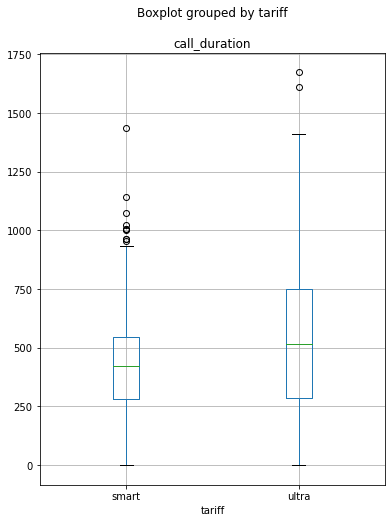

In [34]:
df.boxplot(column='call_duration', by='tariff',  figsize=(6,8))

Text(0.5, 1.0, 'Распределение длительности звонков в месяц для тарифов "Смарт" и "Ультра"')

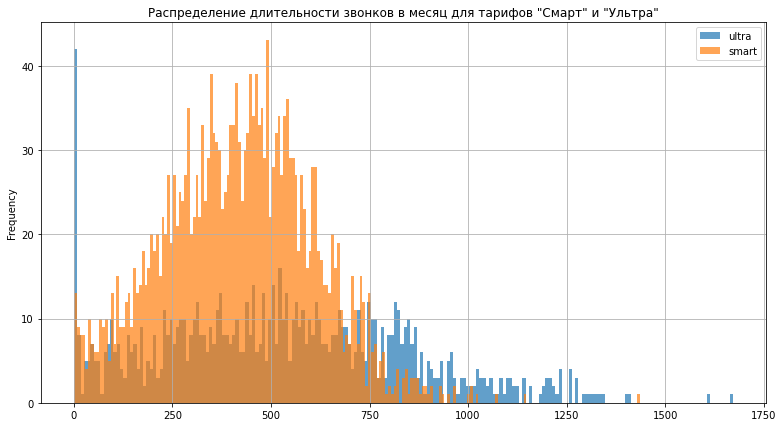

In [35]:
ax=df.query('tariff == "ultra"').plot(y='call_duration',grid=True,figsize=(13,7), kind='hist', bins=200, alpha=0.7, label='ultra')
df.query('tariff == "smart"').plot(y='call_duration',grid=True,figsize=(13,7),kind='hist', bins=200, alpha=0.7, label='smart', ax=ax)
plt.title('Распределение длительности звонков в месяц для тарифов "Смарт" и "Ультра"')

Из боксплота и гистораммы видно, что пользователи тарифа смарт стремятся уложиться в лимит по минутам и разговаривают в основном от 280 до 545 в месяц, но часто это не получается. Пользователи тарифа ультра чувствуют себя более свободно, поэтому разговаривают сколько хотят. Пики в районе 0 объясняются пользователями, которые используют только смс и интернет.

<AxesSubplot:title={'center':'mb_used'}, xlabel='tariff'>

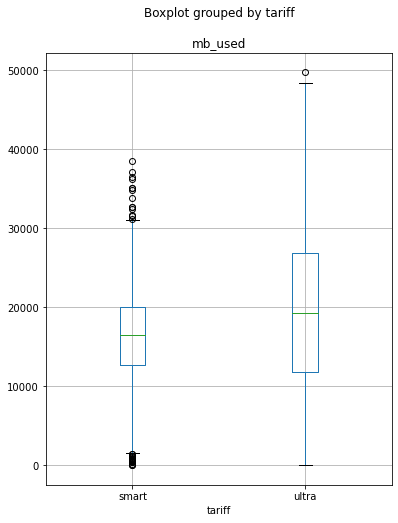

In [36]:
df.boxplot(column='mb_used', by='tariff',  figsize=(6,8))

Text(0.5, 1.0, 'Распределение использованного интернет-трафика в месяц для тарифов "Смарт" и "Ультра"')

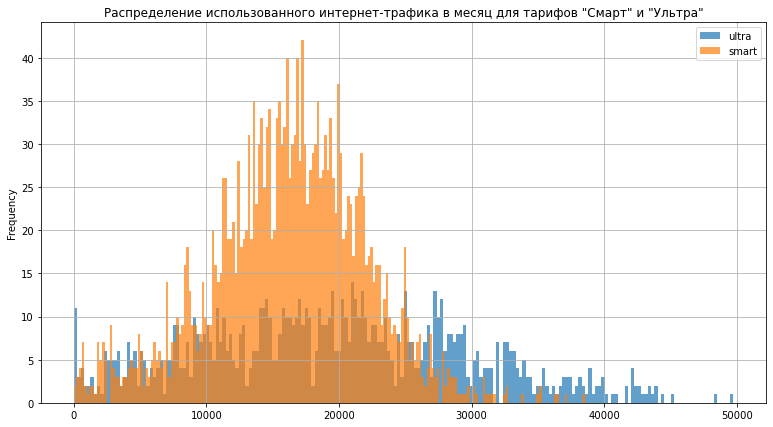

In [37]:
ax=df.query('tariff == "ultra"').plot(y='mb_used',grid=True,figsize=(13,7), kind='hist', bins=200, alpha=0.7, label='ultra')
df.query('tariff == "smart"').plot(y='mb_used',grid=True,figsize=(13,7),kind='hist', bins=200, alpha=0.7, label='smart', ax=ax)
plt.title('Распределение использованного интернет-трафика в месяц для тарифов "Смарт" и "Ультра"')

Пользователи тарифа смарт также стараются укладываться в лимит по использованию интернет-трафика, но у большинства это не получается, в основном он тратят от 12 до 20 гб. Пользователи ультра свободнее расходуют трафик, даже после выхода за лимит, большая их часть тратит от 12 до 26 гб.

<AxesSubplot:title={'center':'messages'}, xlabel='tariff'>

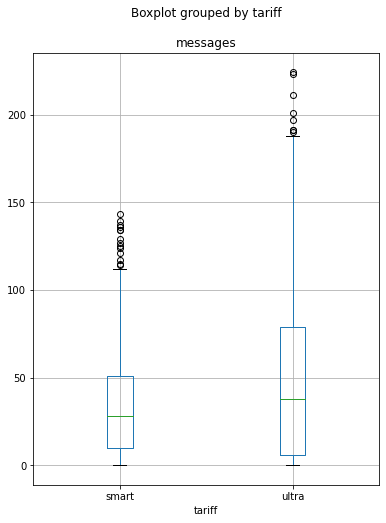

In [38]:
df.boxplot(column='messages', by='tariff',  figsize=(6,8))

Text(0.5, 1.0, 'Распределение количества сообщений в месяц для тарифов "Смарт" и "Ультра"')

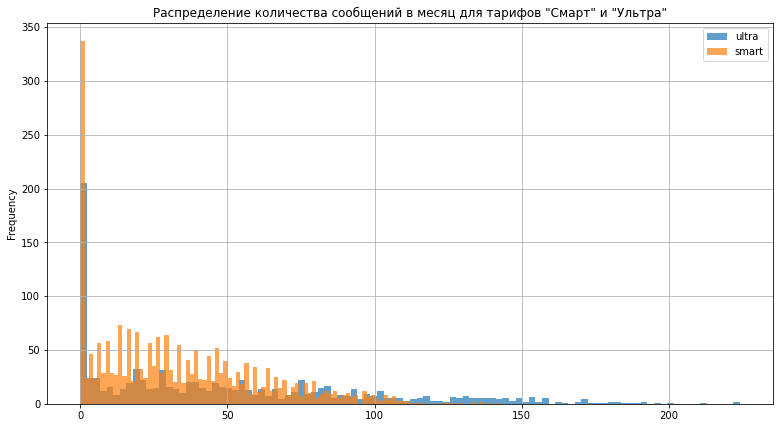

In [39]:
ax=df.query('tariff == "ultra"').plot(y='messages',grid=True,figsize=(13,7), kind='hist', bins=100, alpha=0.7, label='ultra')
df.query('tariff == "smart"').plot(y='messages',grid=True,figsize=(13,7),kind='hist', bins=100, alpha=0.7, label='smart', ax=ax)
plt.title('Распределение количества сообщений в месяц для тарифов "Смарт" и "Ультра"')

In [40]:
df.query('tariff == "smart"')['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

На гистограмме видно большое количество пользователей, которые вообще не используют смс. Пользователи смарт в основном укладываются в лимит по смс (от 10 до 51 в месяц), но часть все равно платит за дополнительные. Пользователи ультра даже близко не приближаюся к лимиту, и опять же пользуются смс по-разному, без ярко выраженных пиков.

Минуты разговора, число сообщений и объем потраченного интернет-трафика по тарифу «Ультра» имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Кроме того, выбросов в рамках более дешевого тарифа существенно больше.
Из боксплотов видно, что пользователи тарифа смарт часто превышают лимиты и оплачивают дополнительные гб и минуты, реже смс.
Поведение пользователей тарифа "Ультра" более разнообразное. Пользователи дорогого тарифа более свободны в выборе того, как именно использовать объемы тарифного пакета: возможно, использование дорогого тарифа помогает им не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

H0  - средняя выручка от пользователей тарифа "Ультра" равна средней выручке от пользователей тарифа "Смарт"
H1 - средние выручки отличаются

α = 1%

In [41]:
smart = df.query('tariff == "smart"')['revenue']
ultra = df.query('tariff == "ultra"')['revenue']

In [42]:
alpha=0.01

Дисперсии выборок пользователей тарифа смарт и ультра

In [43]:
print('Дисперсия выборки пользователей тарифа смарт:', smart.var(ddof=1))
print('Дисперсия выборки пользователей тарифа ультра:', ultra.var(ddof=1))

Дисперсия выборки пользователей тарифа смарт: 669785.7080064153
Дисперсия выборки пользователей тарифа ультра: 141516.74507861698


Т.к. дисперсии выборок довольно сильно отличаются, функции ttest_ind необходимо добавить аргумент equal_var=False 

In [44]:
results = st.ttest_ind(smart, ultra, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Получилось отвергнуть нулевую гипотезу о том, что средние выручки тарифов равны. Следовательно, можно сделать вывод, что средний доход от пользователей тарифов ультра и смарт с вероятностью 99.9% будет отличаться. 
Для наглядности можно вывестисредние доходы от пользователей с разными тарифами.

In [45]:
df.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1289.973531
ultra,2070.152284


<AxesSubplot:title={'center':'revenue'}, xlabel='tariff'>

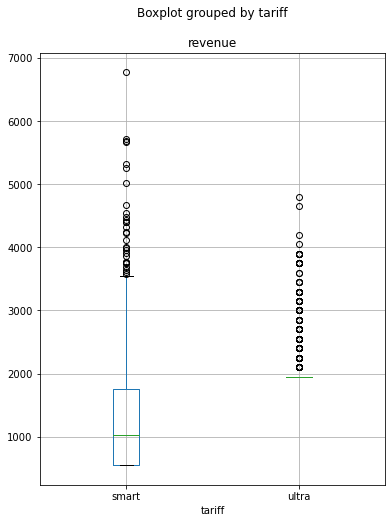

In [46]:
df.boxplot(column='revenue', by='tariff',  figsize=(6,8))

Действительно, средняя выручка значительно отличается.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
H1  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

α=1%

In [47]:
moscow = df.query('city == "Москва"')['revenue']
regions = df.query('city != "Москва"')['revenue']

In [48]:
alpha=0.01

In [49]:
print('Дисперсия выборки пользователей из Москвы:', moscow.var(ddof=1))
print('Дисперсия выборки пользователей из остальных городов:', regions.var(ddof=1))

Дисперсия выборки пользователей из Москвы: 565636.4670118855
Дисперсия выборки пользователей из остальных городов: 654137.6285218047


Дисперсии отличаются, поэтому необходимо снова добавить аргумент equal_var=False 

In [50]:
results = st.ttest_ind(moscow, regions, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу о том, выручка пользователей из Москвы равна средней выручке пользователей из других регионов, не получилось, значит с вероятностью 52,6%, сравнивая средние выручки, получились бы схожие значения.
Для наглядности можно вывестисредние доходы от пользователей из Москвы и других городов.

In [51]:
df.loc[df.loc[:,'city'] != 'Москва', 'city'] = 'Другой город'
df.pivot_table(index='city', values='revenue', aggfunc='mean')

,revenue
city,
Другой город,1524.936227
Москва,1546.713584


## Общие выводы

В процессе работы из 5 файлов с данными была выведена таблица с ежемесячной активностью пользователей и доходом от нее. Пользователи тарифа Ультра почти всегда укладываются в лимиты тарифа, в отличии от использующих Смарт: они часто оплачивают дополнительные минуты или гб. Прибыль от тарифа Ультра больше выручки от Смарта. 
В ходе работы было обнаружено большое количество нулевых значений в продолжительности звонков и использовании интернета. Скорее всего это неудавшиеся сеансы, поэтому от этих строчек пришлось избавиться, но это информацию необходимо уточнить у коллег, т.к. эти данные составляли довольно большую часть.
Гипотеза о том, что средняя выручка пользователей тарифов Ультра и Смарт различается, с 99.9% вероятностью подтверждается, в отличии от второй гипотезы: средние доходы от пользователя в Москве и других городах с 52.6% вероятностью будут схожими. 

Если оценивать только доход с каждого клиента, то пользователи пакета ультра в среднем приносят на 800 рублей больше, но стоит так же оценивать то, как сильно пользователь нагружает сеть, и во сколько это обходится оператору, т.к. средний пользователь ультра больше разговаривает по телефону, отправляет смс и использует трафик. Для определения прибыли с тарифов необходимо уточнить информацию у оператора.